In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

In [41]:
india = pd.read_csv('Dataset/case_time_series.csv')
india['Date'] = pd.date_range('01-30-2020', '07-15-2020')
india.set_index(['Date'], inplace = True)
india['Active Cases'] = india['Total Confirmed'] -  india['Total Recovered']
india

,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Active Cases
Date,,,,,,,
2020-01-30,1,1,0,0,0,0,1
2020-01-31,0,1,0,0,0,0,1
2020-02-01,0,1,0,0,0,0,1
2020-02-02,1,2,0,0,0,0,2
2020-02-03,1,3,0,0,0,0,3
...,...,...,...,...,...,...,...
2020-07-11,27757,850366,19981,536232,543,22689,314134
2020-07-12,29106,879472,18198,554430,500,23189,325042
2020-07-13,28178,907650,17683,572113,541,23730,335537


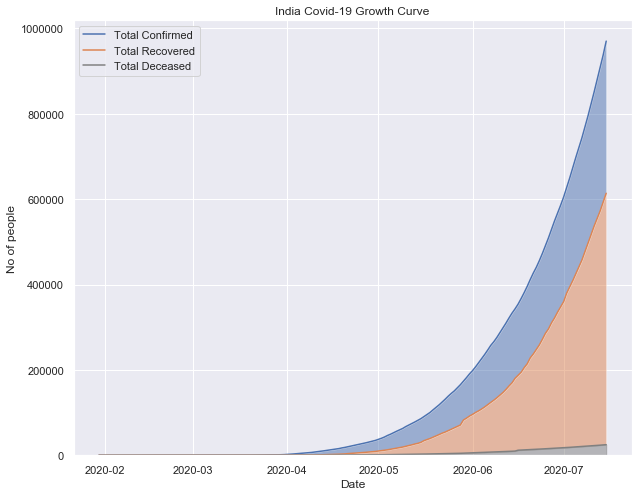

In [150]:
plt.figure(figsize = (10, 8))
plt.plot(india.index, india['Total Confirmed'])
plt.plot(india.index, india['Total Recovered'])
plt.plot(india.index, india['Total Deceased'], color = 'grey')
#plt.plot(india.index, india['Active Cases'], color = 'forestgreen', alpha = 0.5)
plt.fill_between(india.index, india['Total Confirmed'], india['Total Recovered'], alpha = 0.5)
plt.fill_between(india.index, india['Total Recovered'], india['Total Deceased'], alpha = 0.5)
plt.fill_between(india.index, india['Total Deceased'], 0, alpha = 0.5, color = 'grey')
plt.legend(['Total Confirmed', 'Total Recovered', 'Total Deceased'])
plt.xlabel('Date') 
plt.ylim(bottom = 0)
plt.ylabel('No of people')
plt.title('India Covid-19 Growth Curve')
plt.savefig('plots/growth-curve.png')

In [146]:
import itertools

In [98]:
y = india['Total Confirmed']
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [102]:
import statsmodels.api as sm

In [126]:
mod_total = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_total = mod_total.fit()

mod_rec = sm.tsa.statespace.SARIMAX(india['Total Recovered'],
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_rec = mod_rec.fit()

/home/amit/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/amit/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/amit/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/amit/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


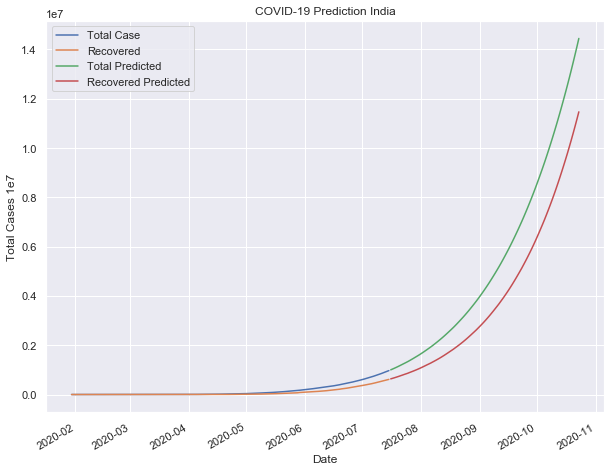

In [147]:
plt.figure(figsize = (10, 8))
pred_total = results_total.get_forecast(steps = 100)
pred_rec = results_rec.get_forecast(steps = 100)
plt.plot(india.index, india['Total Confirmed'])
plt.plot(india.index, india['Total Recovered'])
pred_total.predicted_mean.plot()
pred_rec.predicted_mean.plot()
plt.legend(['Total Case', 'Recovered', 'Total Predicted', 'Recovered Predicted'])
plt.title('COVID-19 Prediction India')
plt.xlabel('Date')
plt.ylabel('Total Cases 1e7')
plt.savefig('plots/predictioncurve-11-2020.png')